## Import and Load Data

In [41]:
import warnings
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [42]:
# Load the datasets
df = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

## Data Overview

In [57]:
df.info()
df.describe().round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.0,70692.00,70692.00,70692.00,70692.00,70692.00,70692.00,70692.00,70692.00,70692.00,...,70692.00,70692.00,70692.00,70692.00,70692.00,70692.00,70692.00,70692.00,70692.00,70692.00
mean,0.5,0.56,0.53,0.98,29.86,0.48,0.06,0.15,0.70,0.61,...,0.95,0.09,2.84,3.75,5.81,0.25,0.46,8.58,4.92,5.70
std,0.5,0.50,0.50,0.16,7.11,0.50,0.24,0.35,0.46,0.49,...,0.21,0.29,1.11,8.16,10.06,0.43,0.50,2.85,1.03,2.18
min,0.0,0.00,0.00,0.00,12.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00
25%,0.0,0.00,0.00,1.00,25.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.00,2.00,0.00,0.00,0.00,0.00,7.00,4.00,4.00
50%,0.5,1.00,1.00,1.00,29.00,0.00,0.00,0.00,1.00,1.00,...,1.00,0.00,3.00,0.00,0.00,0.00,0.00,9.00,5.00,6.00
75%,1.0,1.00,1.00,1.00,33.00,1.00,0.00,0.00,1.00,1.00,...,1.00,0.00,4.00,2.00,6.00,1.00,1.00,11.00,6.00,8.00
max,1.0,1.00,1.00,1.00,98.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,5.00,30.00,30.00,1.00,1.00,13.00,6.00,8.00


# Columns Explained 
**Diabetes_binary**: 0 = no diabetes. 1 = prediabetes or diabetes

**HighBP**: 0 = no high BP. 1 = high BP

**HighChol**: 0 = no high cholesterol. 1 = high cholesterol

**CholCheck**: 0 = no cholesterol check in 5 years. 1 = yes cholesterol check in 5 years

**BMI**: Body Mass Index

**Smoker**: Have you smoked at least 100 cigaretes in your entire life? 0 = no. 1 = yes

**Stroke**: Did you have stroke? 0 = no. 1 = yes

**HeartDiseaseorAttack**: Coronary heart disease (CHD) or myocardial infraction (MI)? 0 = no. 1 = yes

**PhysActivity**: Physical activity in past 30 days - not including job? 0 = no. 1 = yes

**Fruits**: Consume fruit 1 or more times per day? 0 = no. 1 = yes

**Veggies**: Consume vegetables 1 or more times per day? 0 = no. 1 = yes

**HvyAlcoholConsump**: (adult men >= 14 drinks per week and adult women >= 7 drinks per week)? 0 = no. 1 = yes

**AnyHealthcare**: Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc.? 0 = no. 1 = yes

**NoDocbcCost**: Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no. 1 = yes

**GenHlth**: Would you say that in general your health is: (scale 1-5) 1 = excellent. 2 = very good. 3 = good. 4 = fair. 5 = poor

**MentHlth**: Days of poor mental health. (scale 1-30 days)

**PhysHlth**: Physical illness or injury days in past 30 days. (scale 1-30 days)

**DiffWalk**: Do you have serious difficulty walking or climbing stairs? 0 = no. 1 = yes

**Sex**: 0 = female. 1 = male

**Age**: AGEG5YR CATEGORIES.

1: Age 18 to 24

2: Age 25 to 29

3: Age 30 to 34

4: Age 35 to 39

5: Age 40 to 44

6: Age 45 to 49

7: Age 50 to 54

8: Age 55 to 59

9: Age 60 to 64

10: Age 65 to 69

11: Age 70 to 74

12: Age 75 to 79

13: Age 80 or older


**Education**: EDUCA CATEGORIES.

1: Never attended school or only kindergarten

2: Grades 1 through 8 (Elementary)

3: Grades 9 through 11 (Some high school)

4: Grade 12 or GED (High school graduate)

5: College 1 year to 3 years (Some college or technical school)

6: College 4 years or more (College graduate)


**Income**: INCOME CATEGORIES.

1: Less than 10,000 USD

2: Less than 15,000 USD (10,000 to less than 15,000)

3: Less than 20,000 USD (15,000 to less than 20,000)

4: Less than 25,000 USD (20,000 to less than 25,000)

5: Less than 35,000 USD (25,000 to less than 35,000)

6: Less than 50,000 USD (35,000 to less than 50,000)

7: Less than 75,000 USD (50,000 to less than 75,000)

8: 75,000 USD or more

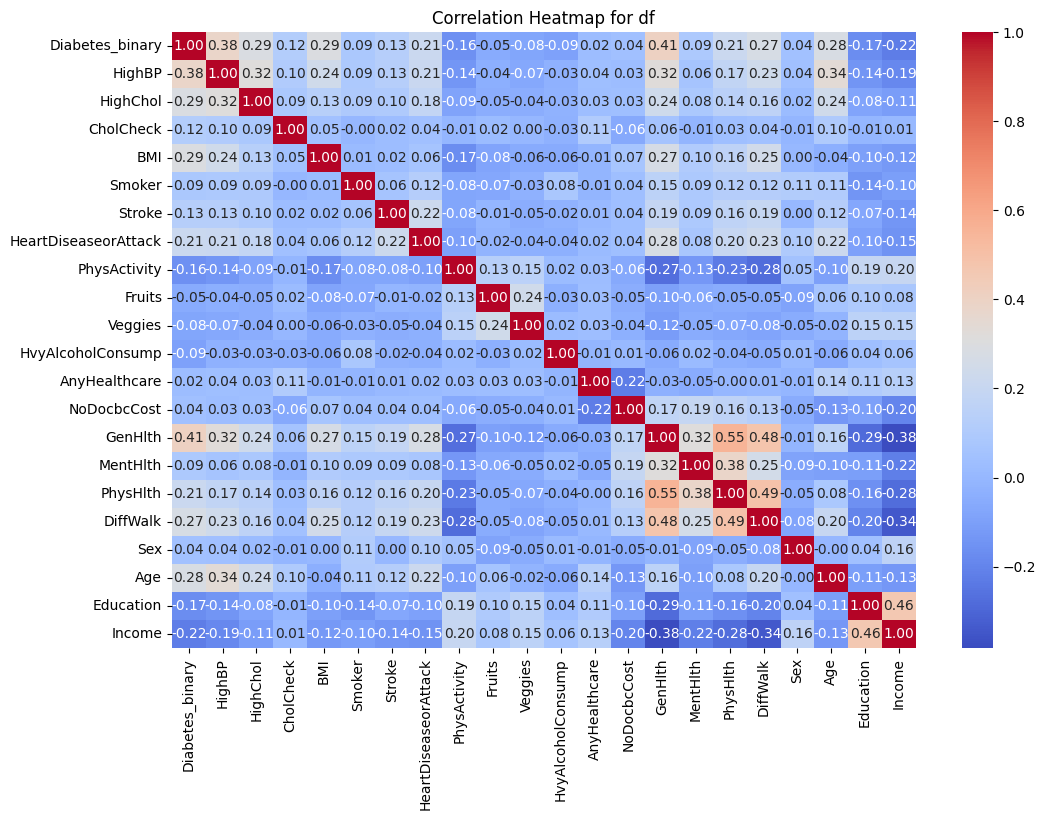

In [44]:
# Correlation heatmap for df
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for df')
plt.show()

<Axes: title={'center': 'Correlation with Diabetes Column'}>

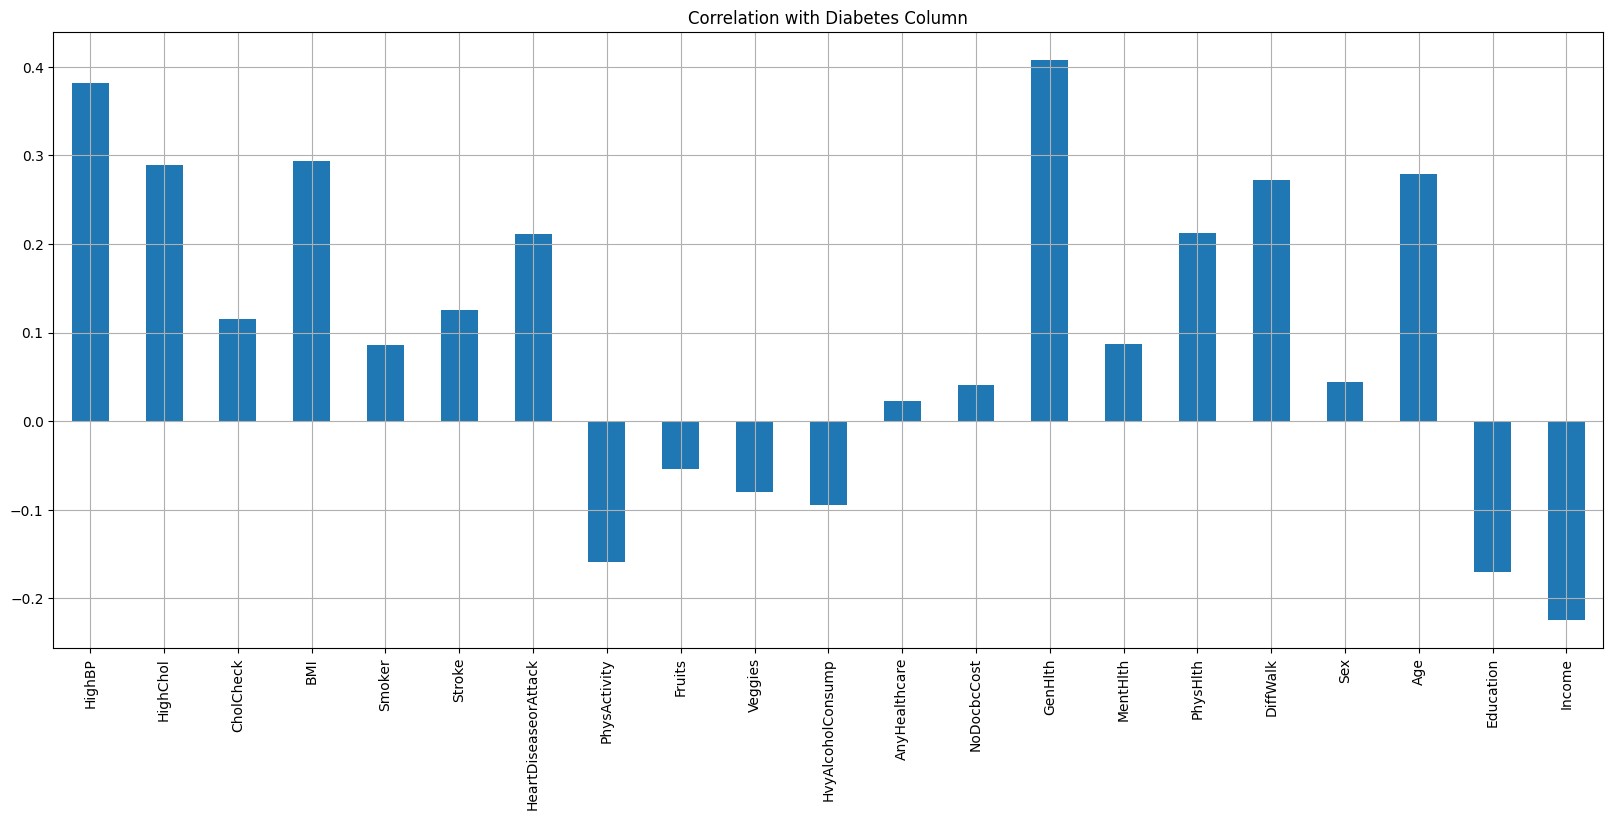

In [58]:
df.drop('Diabetes_binary', axis=1).corrwith(df.Diabetes_binary).plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with Diabetes Column")

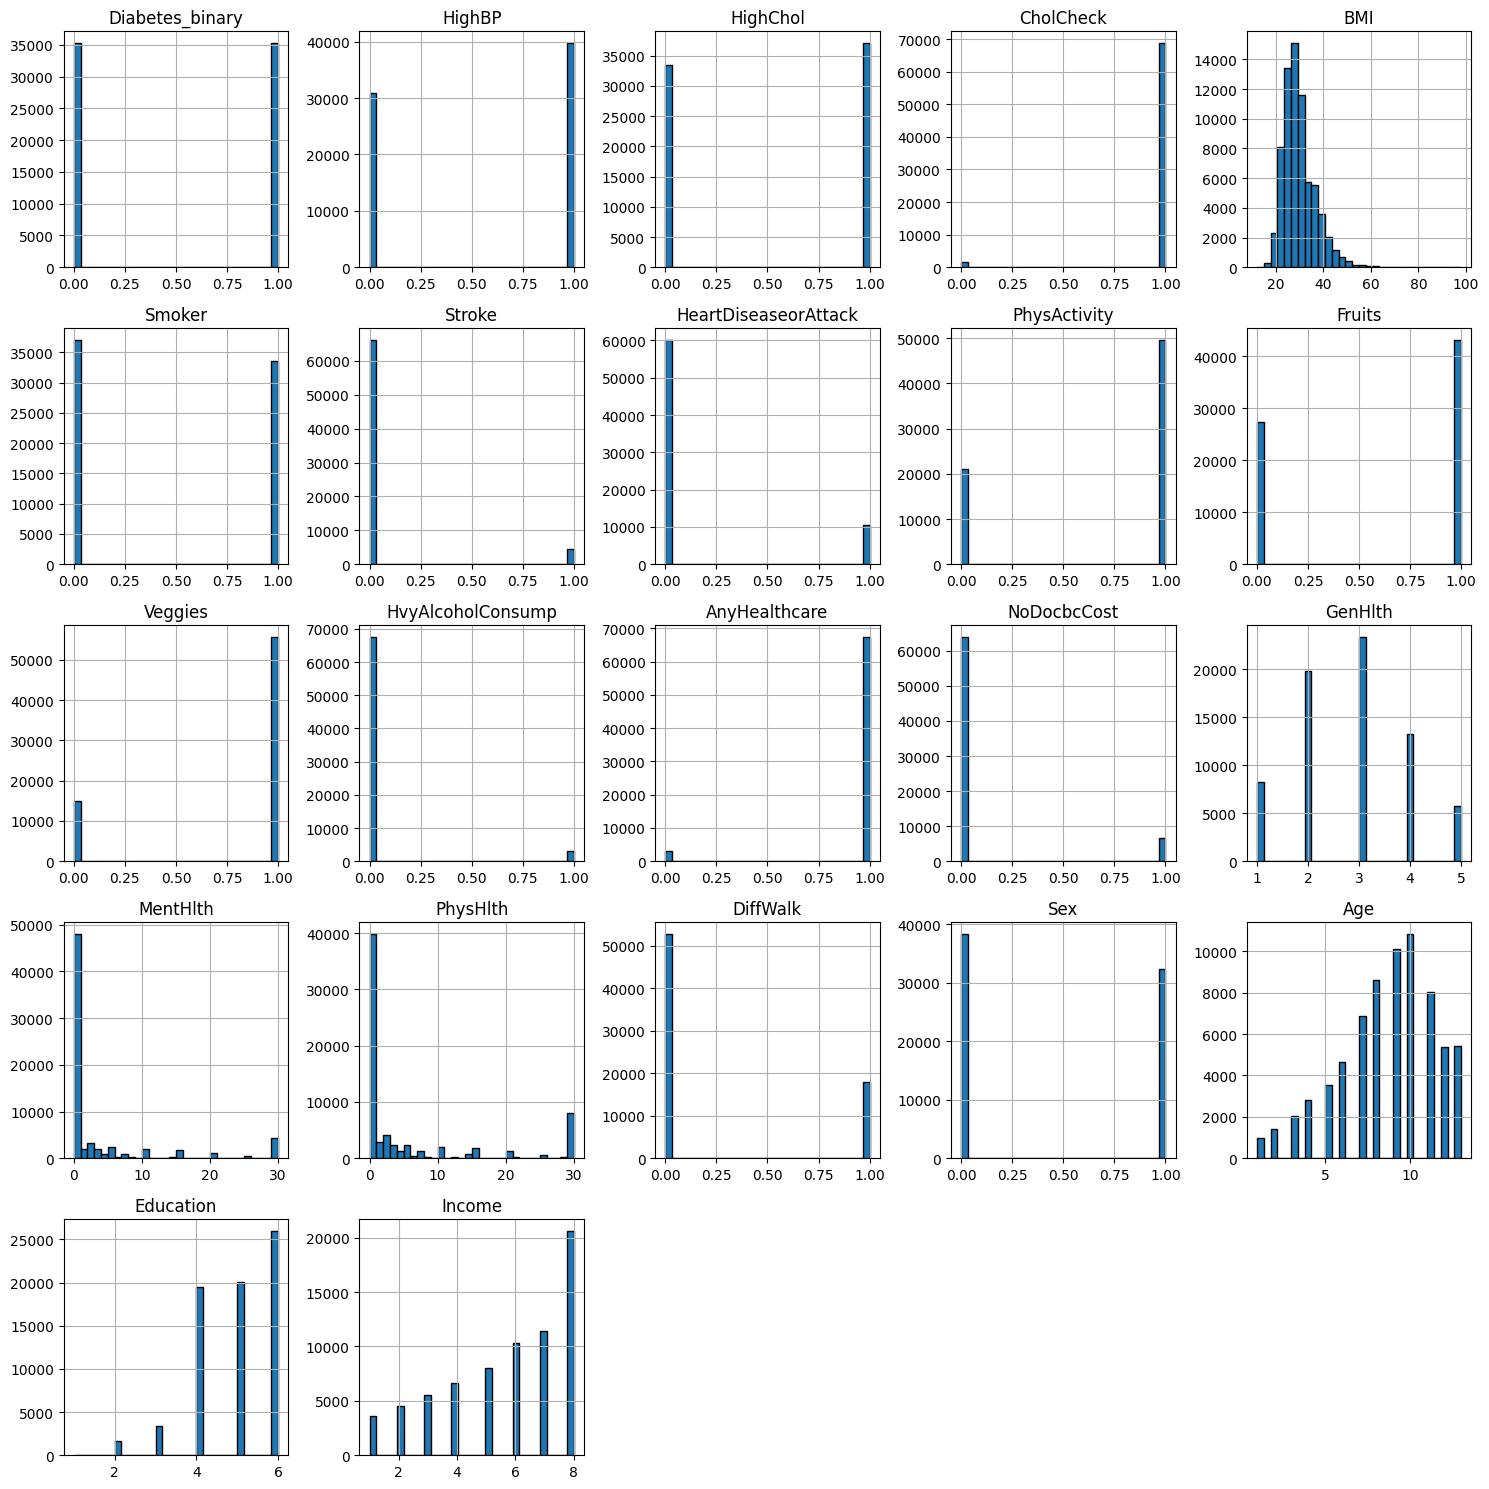

In [49]:
df.hist(figsize=(15, 15), bins=30, edgecolor='black')

# Display the histograms
plt.tight_layout()  # Adjusts spacing between plots
plt.show()

## Predictive Modeling

In [50]:
# prepare data
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

# training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# random forest classifier
model = RandomForestClassifier(n_estimators=125, random_state=42)
model.fit(X_train, y_train)

# predictions
y_pred = model.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# evaluate model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [52]:
accuracy

0.7359784991866468

In [53]:
conf_matrix

array([[4896, 2194],
       [1539, 5510]])

In [54]:
print(class_report)

              precision    recall  f1-score   support

         0.0       0.76      0.69      0.72      7090
         1.0       0.72      0.78      0.75      7049

    accuracy                           0.74     14139
   macro avg       0.74      0.74      0.74     14139
weighted avg       0.74      0.74      0.74     14139



## Feature Importance/Correlation

                 Feature  Importance
3                    BMI    0.168274
18                   Age    0.126032
13               GenHlth    0.104716
20                Income    0.084134
0                 HighBP    0.078958
15              PhysHlth    0.067852
19             Education    0.058188
14              MentHlth    0.052144
1               HighChol    0.040787
4                 Smoker    0.028742
8                 Fruits    0.028165
16              DiffWalk    0.026433
17                   Sex    0.026349
7           PhysActivity    0.023409
9                Veggies    0.021698
6   HeartDiseaseorAttack    0.019122
12           NoDocbcCost    0.012017
5                 Stroke    0.009928
10     HvyAlcoholConsump    0.009557
11         AnyHealthcare    0.007582
2              CholCheck    0.005913


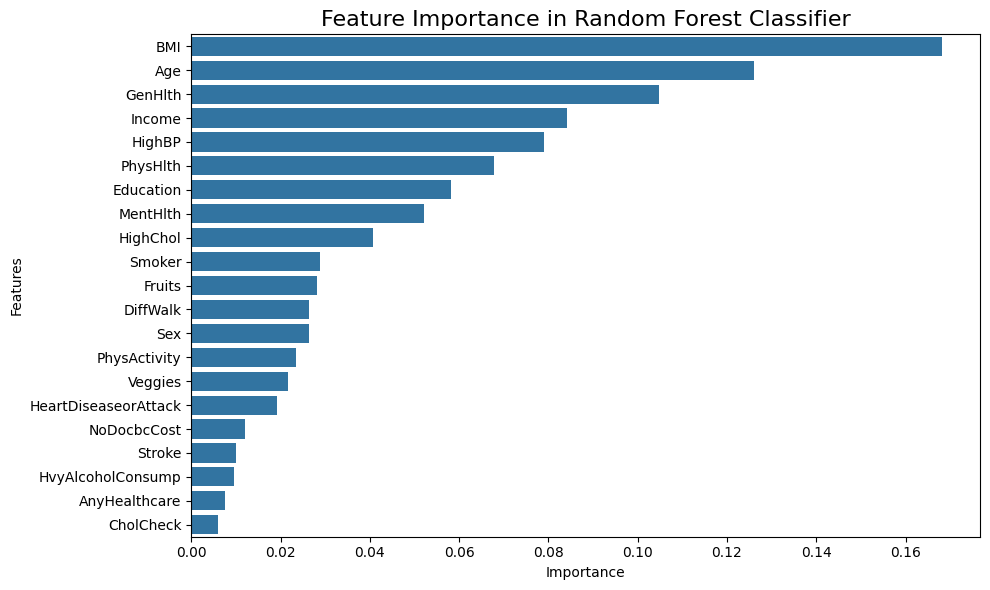

In [55]:
# get importance
importance = model.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
})

# Sort by Importance (most important features at the top)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance
print(importance_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)

# Adding labels and title
plt.title('Feature Importance in Random Forest Classifier', fontsize=16)
plt.xlabel('Importance')
plt.ylabel('Features')

# Display the plot
plt.tight_layout()
plt.show()

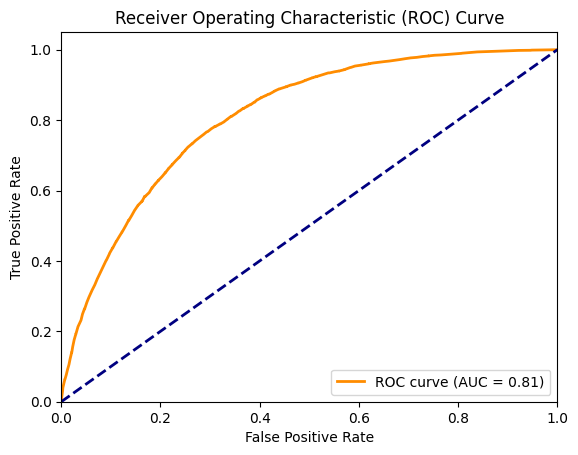

In [56]:
from sklearn.metrics import roc_curve, roc_auc_score
y_probs = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Model is good at distinguishing non-diabetes and diabetes